# Tutorial 2.3: Deriving the EOM of a 2DOF system

<center><img src="../images/Module2/w2_t3_mcksystem2dof.png" width="400" /></center>

## Part 1: Kinematic equations

We first start by defining the variables. Assuming that x1, and x2 are the positions of block 1 and 2 respectively. The wall is located at x0

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import *

var("t x0 x1 x2")      
x1 = Function("x1")(t)
x2 = Function("x2")(t)


In [190]:
# Define the kinematic relations here

The velocities can then be obtained using:

-----------------------------------------------------------------------------------------------------
**Problem**: Define the velocities

*Hint*: Use derivatives.

---------------------------------------------------------------------------------------------------

In [191]:
# Compute/define the velocities here

## Part 2: Energy equations
### Kinetic energy:
There are 2 masses in this system.

-----------------------------------------------------------------------------------------------------
**Problem**: Define the kinetic energy

---------------------------------------------------------------------------------------------------

In [192]:
var("m1 m2")
# Define the kinetic energy here (T)


### Potential energy:

The work done by the spring between the wall and block 1, and between block 1 and 2 contributes to the potential energy. When assuming that the spring length does not change in time, the work done is dependent not on x1 and x2, but on the change in length.

-----------------------------------------------------------------------------------------------------
**Problem**: Define the potential energy V.

---------------------------------------------------------------------------------------------------

In [193]:
var("k1 l1_0 k2 l2_0")
# Define the potential energy here (V)

### Work by external force
The work done by an external force working in the horizontal direction. The forces act on block 1 and 2 respectively

-----------------------------------------------------------------------------------------------------
**Problem**: Define the external work.

---------------------------------------------------------------------------------------------------

In [194]:
F1 = Function("F1")(t)
F2 = Function("F2")(t)

# Define your external work here (W)

## Step 3: Construct the Lagrangian

-----------------------------------------------------------------------------------------------------
**Problem**: Use T, V and W to find the lagrangian L. Simplify it using L.evalf()

---------------------------------------------------------------------------------------------------

In [195]:
# Define your Lagrangian here (L)

### Dissipating energy

The contribution of the dashpot system must be added too. This is prepared here.

In [196]:
var("c1 c2")
# the dashpots depend on dl as well!
v_dl1 = diff(dl1, t)
v_dl2 = diff(dl2, t)

D = 0.5*c1*v_dl1**2 + 0.5*c2*v_dl2**2

## Step 4: Obtaining the EoM

In order to obtain the EoMs we have to take derivatives w.r.t. $x_1$ and its velocity, as well as $x_2$. 

In [197]:
# Compute the EOM here
EOM_x1 = diff( diff(L, diff(x1,   t)), t) + diff(D, v1)- diff(L, x1)
EOM_x2 = diff( diff(L, diff(x2,   t)), t) + diff(D, v2)- diff(L, x2)

Now we isolate it for the acceleration. Then we convert the EOM to matrices for easier interpretation. 

In [198]:
var("acc1 acc2 vel1 vel2")

dict_values = {Derivative(x1, (t,2)): acc1,
               Derivative(x2, (t,2)): acc2,
               Derivative(x1, t): vel1,
               Derivative(x2, t): vel2}

EOM_1 = EOM_x1.evalf(subs=dict_values)
EOM_2 = EOM_x2.evalf(subs=dict_values)

MTRX = linear_eq_to_matrix([EOM_1, EOM_2], [acc1, acc2])

M = MTRX[0]
F = MTRX[1]

In [199]:
M

Matrix([
[1.0*m1,      0],
[     0, 1.0*m2]])

In [200]:
F

Matrix([
[-1.0*c1*vel1 - 0.5*c2*(2.0*vel1 - 2.0*vel2) - 0.5*k1*(-2.0*l1_0 - 2.0*x0 + 2.0*x1(t)) - 0.5*k2*(2.0*l2_0 + 2.0*x1(t) - 2.0*x2(t)) - F1(t)],
[                                                      -0.5*c2*(-2.0*vel1 + 2.0*vel2) - 0.5*k2*(-2.0*l2_0 - 2.0*x1(t) + 2.0*x2(t)) - F2(t)]])

As one can see, this system is already linearized. We can therefore immediately start solving the system. In case of a non-linear example, the linearization must be performed for each EOM separately.

## Step 5: Solve the equation

In [208]:
# Just plugging in some random variables
wall_x0 = 0
mass1 = 1
mass2 = 2
damp1 = 3
damp2 = 4
spring1 = 50
spring2 = 60
length1_0 = 7
length2_0 = 8
t0 = 0
tf = 10
def Force_func_1(t):
    return 10 * np.cos(np.pi * t)
def Force_func_2(t):
    return 1 - 3 * np.sin(3 * np.pi * t)

def qdot(time,q):
    
    vt = q[int(len(q)/2):]
    
    Force1 =  Force_func_1(time)
    Force2 =  Force_func_2(time)
    dict_values = { x0: wall_x0,
                    F1: Force1, F2: Force2, 
                    m1: mass1, m2: mass2,
                    c1: damp1, c2: damp2,
                    k1: spring1, k2: spring2,
                    l1_0: length1_0, l2_0: length2_0,
                    x1: q[0], x2: q[1],
                    vel1: q[2], vel2: q[3]}  
    Mass_matr =  M.evalf(subs=dict_values)
    Force_vect = F.evalf(subs=dict_values)
    at = Mass_matr.inv()*Force_vect
    
    return list(vt) + list(np.transpose(at)[0])

In [209]:
disp0 = [length1_0,length2_0]
velo0 = [0,0]
q0 = disp0+velo0
sol = solve_ivp(fun=qdot,t_span=[0,tf],y0=q0)

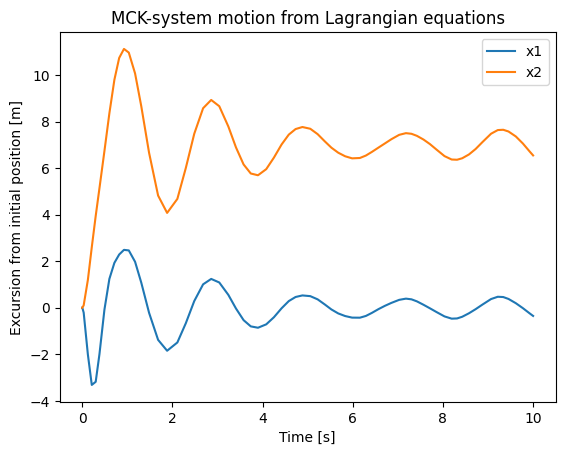

In [210]:
plt.plot(sol.t,sol.y[0]-length1_0, label="x1")
plt.plot(sol.t,sol.y[1]-length2_0, label="x2")
plt.xlabel("Time [s]")
plt.ylabel("Excursion from initial position [m]")
plt.title("MCK-system motion from Lagrangian equations")
plt.legend();

We see some interesting points here:
- The results look quite complex, indicating that a numerical solution is most likely a lot easier than trying to derive the solution analytically.
- The x2 trace diverges from the mean line, this is off course a consquence of the first term of `Force_func_2(t)`
- The high values of the excursion are a consquence of the choice of input parameters. Higher stiffnesses will reduce the excursions. Do take into account that higher stiffnesses result in higher accelerations, reducting the time step that solve_ivp uses. This may increase calculation times.

-----------------------------------------------------------------------------------------------------
[The solution can be found here.](w2_t3_sol.ipynb)